In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\pundi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
from tensorflow.keras.datasets import fashion_mnist

C:\Users\pundi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pundi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pundi\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [72]:
j=x_train[6].reshape(1,28,28)


In [76]:
x_train = x_train/255
x_test = x_test/255

In [19]:
x_train.shape

(60000, 28, 28)

In [21]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [24]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [33]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 242s 4ms/sample - loss: 0.4070 - acc: 0.8547 - val_loss: 0.3132 - val_acc: 0.8858
Epoch 2/3
60000/60000 [==============================] - 237s 4ms/sample - loss: 0.2842 - acc: 0.8967 - val_loss: 0.2950 - val_acc: 0.8905
Epoch 3/3
60000/60000 [==============================] - 243s 4ms/sample - loss: 0.2348 - acc: 0.9129 - val_loss: 0.2755 - val_acc: 0.9012


In [35]:
df = pd.DataFrame(model.history.history)

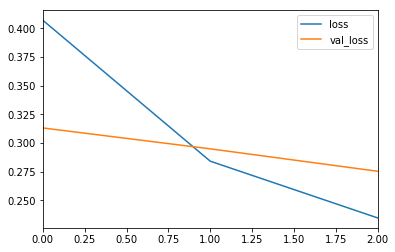

In [43]:
df[['loss','val_loss']].plot()

In [44]:
predictions = model.predict_classes(x_test)

In [45]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [50]:
x_test.shape

(10000, 28, 28, 1)

In [53]:
x_train.shape

(60000, 28, 28, 1)

In [55]:
a = x_train[0].reshape(1,28,28,1)

In [57]:
a.shape

(1, 28, 28, 1)

In [58]:
model.predict_classes(a)

array([9], dtype=int64)